<a href="https://colab.research.google.com/github/roshanappa/Anomaly-Detection-Techniques-/blob/master/Time_Series_Analysis_Temperature_Forecasting_Problem_Statement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 

In [136]:
df = pd.read_csv('/content/datatraining.txt',sep=',')

In [137]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [138]:
df.tail()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1
8143,2015-02-10 09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1


In [139]:
df.shape

(8143, 7)

In [140]:
df.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [141]:
df.nunique()

date             8143
Temperature       265
Humidity         1325
Light             889
CO2              2282
HumidityRatio    3583
Occupancy           2
dtype: int64

In [142]:
df.drop(columns=['Occupancy'],inplace=True)

In [143]:
df.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
dtype: object

In [144]:
df['date']= pd.to_datetime(df['date'])

In [145]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757


In [146]:
df.set_index('date',inplace=True)

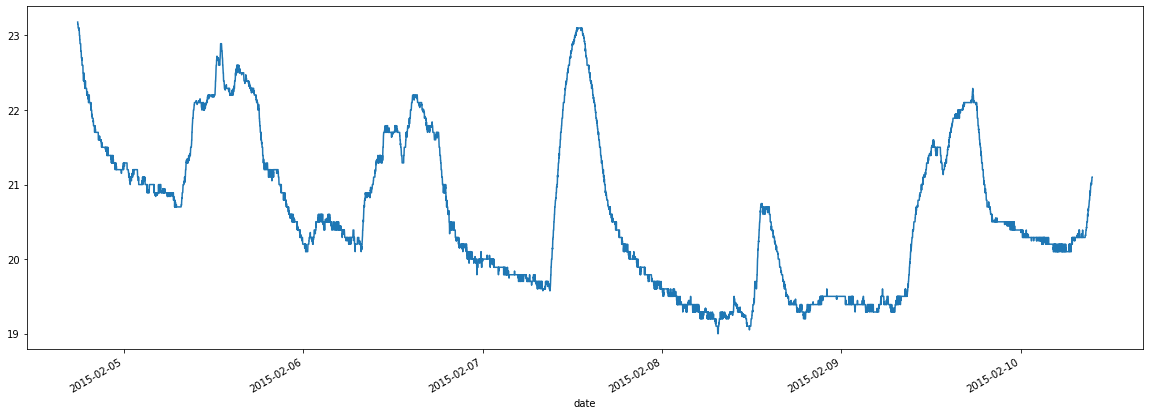

In [147]:
df['Temperature'].plot(figsize=(20,7))

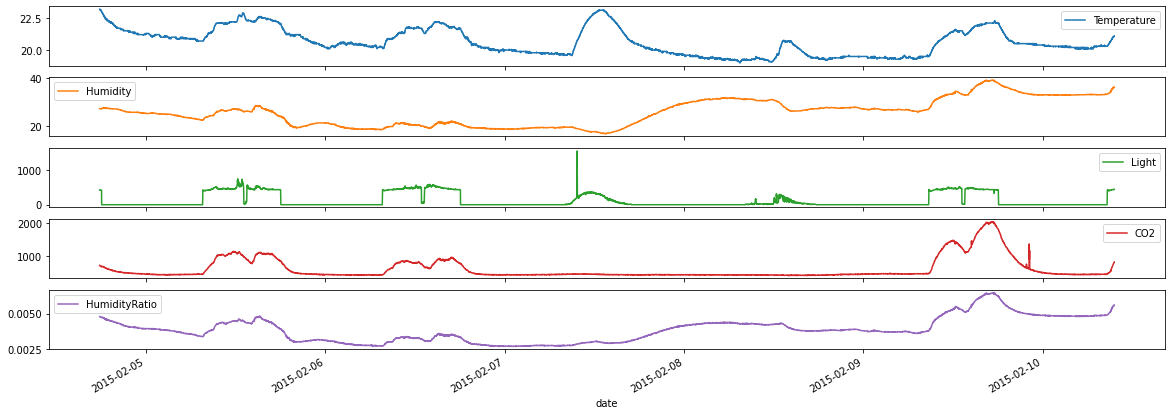

In [148]:
df.plot(subplots=True,figsize=(20,7))
plt.show()

In [149]:
df.isnull().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
dtype: int64

## Data Preprocessing.

In [150]:
df.shape

(8143, 5)

In [151]:
features = df
target = df['Temperature']

In [152]:
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.30,shuffle=False)

In [153]:
X_train.shape,X_test.shape

((5700, 5), (2443, 5))

In [154]:
Y_train.shape,Y_test.shape

((5700,), (2443,))

In [155]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [156]:
x_scaler = MinMaxScaler()
X_train = xscaler.fit_transform(X_train)
X_test  = xscaler.transform(X_test)

In [157]:
y_scaler = MinMaxScaler()
Y_train = yscaler.fit_transform(Y_train.to_numpy().reshape(-1,1))
Y_test  = yscaler.transform(Y_test.to_numpy().reshape(-1,1))

In [158]:
Y_train.shape,Y_test.shape

((5700, 1), (2443, 1))

In [159]:
win_length=12 #This is for day.
batch_size=20
num_features =5

train_generator = TimeseriesGenerator(X_train,Y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator  = TimeseriesGenerator(X_test,Y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

In [160]:

import keras
model = Sequential()
model.add(keras.layers.LSTM(200,return_sequences=True,input_shape=(win_length,num_features)))
model.add(keras.layers.ReLU())
model.add(keras.layers.LSTM(128,return_sequences=True))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(0.20))
model.add(keras.layers.LSTM(128,return_sequences=False))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1))

In [161]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 12, 200)           164800    
_________________________________________________________________
re_lu_3 (ReLU)               (None, 12, 200)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 12, 128)           168448    
_________________________________________________________________
re_lu_4 (ReLU)               (None, 12, 128)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 128)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [162]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [163]:
history=model.fit_generator(train_generator,epochs=100,validation_data=test_generator,shuffle=False)

Epoch 1/100
285/285 [==============================] - 3s 12ms/step - loss: 0.0172 - mae: 0.0790 - val_loss: 0.0281 - val_mae: 0.1407
Epoch 2/100
285/285 [==============================] - 3s 9ms/step - loss: 0.0171 - mae: 0.0825 - val_loss: 0.0308 - val_mae: 0.1443
Epoch 3/100
285/285 [==============================] - 3s 9ms/step - loss: 0.0259 - mae: 0.1071 - val_loss: 0.0697 - val_mae: 0.1958
Epoch 4/100
285/285 [==============================] - 2s 9ms/step - loss: 0.0500 - mae: 0.1661 - val_loss: 0.0524 - val_mae: 0.1819
Epoch 5/100
285/285 [==============================] - 2s 8ms/step - loss: 0.0462 - mae: 0.1648 - val_loss: 0.0275 - val_mae: 0.1383
Epoch 6/100
285/285 [==============================] - 2s 8ms/step - loss: 0.0184 - mae: 0.1020 - val_loss: 0.0346 - val_mae: 0.1597
Epoch 7/100
285/285 [==============================] - 2s 8ms/step - loss: 0.0123 - mae: 0.0803 - val_loss: 0.0137 - val_mae: 0.0990
Epoch 8/100
285/285 [==============================] - 2s 8ms/step -

In [168]:
history.history

{'loss': [0.017175640910863876,
  0.017107676714658737,
  0.025888100266456604,
  0.05000616982579231,
  0.046208661049604416,
  0.018386762589216232,
  0.012278090231120586,
  0.01606116257607937,
  0.01178784016519785,
  0.008070726878941059,
  0.007998130284249783,
  0.009378086775541306,
  0.006944005843251944,
  0.006939670071005821,
  0.007008960470557213,
  0.0063270581886172295,
  0.005963188596069813,
  0.006022515706717968,
  0.005655893124639988,
  0.006231770850718021,
  0.005589199718087912,
  0.004354736767709255,
  0.003862234763801098,
  0.002853641752153635,
  0.003101494163274765,
  0.002428211970254779,
  0.00297674722969532,
  0.002594584133476019,
  0.0021257305052131414,
  0.0019486098317429423,
  0.0016444853972643614,
  0.0019747146870940924,
  0.0020696534775197506,
  0.003501162165775895,
  0.003686225274577737,
  0.0033760054502636194,
  0.0023840332869440317,
  0.002143687568604946,
  0.0017524786526337266,
  0.0019887539092451334,
  0.001866082544438541,
  

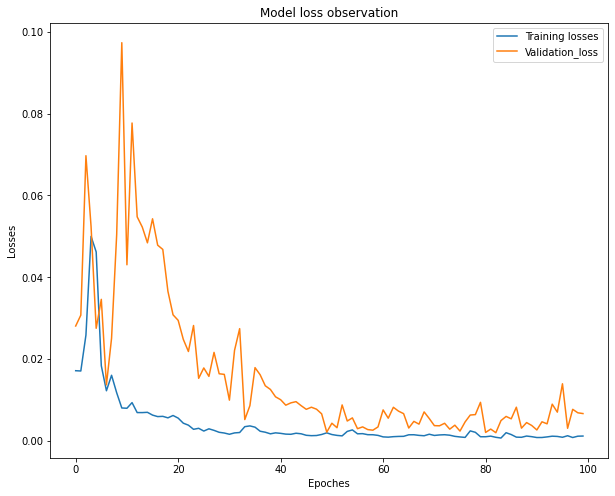

In [165]:
plt.figure(figsize=(10,8))
train_loss= history.history['loss']
test_loss = history.history['val_loss']
plt.plot(range(len(train_loss)),train_loss)
plt.plot(range(len(test_loss)),test_loss)
plt.xlabel('Epoches')
plt.ylabel('Losses')
plt.title('Model loss observation')
plt.legend(['Training losses','Validation_loss'])
plt.show()

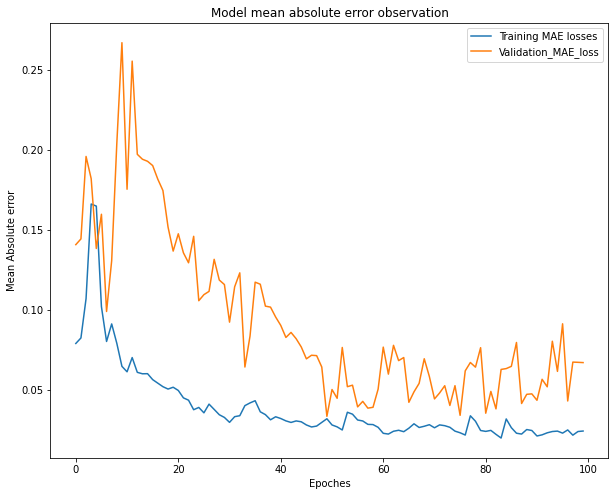

In [169]:
plt.figure(figsize=(10,8))
train_loss= history.history['mae']
test_loss = history.history['val_mae']
plt.plot(range(len(train_loss)),train_loss)
plt.plot(range(len(test_loss)),test_loss)
plt.xlabel('Epoches')
plt.ylabel('Mean Absolute error')
plt.title('Model mean absolute error observation')
plt.legend(['Training MAE losses','Validation_MAE_loss'])
plt.show()

In [187]:
first_evalution_batch = X_train[-12:]

In [188]:
first_evalution_batch

array([[0.11961722, 0.67836844, 0.01455055, 0.0141136 , 0.50904275],
       [0.12559809, 0.67836844, 0.01196379, 0.016179  , 0.5117922 ],
       [0.11961722, 0.67836844, 0.01896961, 0.01824441, 0.50904275],
       [0.11961722, 0.67836844, 0.01552059, 0.01239243, 0.50904275],
       [0.11961722, 0.67836844, 0.01552059, 0.01755594, 0.50904275],
       [0.11961722, 0.67836844, 0.01552059, 0.016179  , 0.50904275],
       [0.12559809, 0.68204614, 0.01552059, 0.01273666, 0.51541286],
       [0.11961722, 0.68020729, 0.01552059, 0.01790017, 0.51085022],
       [0.11961722, 0.68204614, 0.01552059, 0.01273666, 0.51265771],
       [0.11961722, 0.68572384, 0.01552059, 0.01457258, 0.51627277],
       [0.11961722, 0.68572384, 0.01552059, 0.01927711, 0.51627277],
       [0.11961722, 0.68572384, 0.01552059, 0.01239243, 0.51627277]])

In [189]:
first_evalution_batch.shape

(12, 5)

In [190]:
first_evalution_batch = first_evalution_batch.reshape(1,first_evalution_batch.shape[0],first_evalution_batch.shape[1])

In [229]:
result=model.predict(first_evalution_batch)

In [230]:
result = yscaler.inverse_transform(result)
result

array([[19.410305]], dtype=float32)

In [192]:
first_evalution_batch.shape

(1, 12, 5)

In [200]:
predictions = model.predict_generator(test_generator)

Instructions for updating:
Please use Model.predict, which supports generators.


In [201]:
predictions

array([[0.08250844],
       [0.07720819],
       [0.07208079],
       ...,
       [0.43631622],
       [0.43832162],
       [0.44027868]], dtype=float32)

In [202]:
predictions.shape

(2431, 1)

In [217]:
df_final = df[predictions.shape[0]*-1:]

In [221]:
df_final.count()

Temperature      2431
Humidity         2431
Light            2431
CO2              2431
HumidityRatio    2431
dtype: int64

In [222]:
predicted = yscaler.inverse_transform(predictions)
predicted

array([[19.344885],
       [19.32273 ],
       [19.301296],
       ...,
       [20.823803],
       [20.832184],
       [20.840364]], dtype=float32)

In [225]:
df_final['Predicted_temperature'] = predicted

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [228]:
df_final[:15]

,Temperature,Humidity,Light,CO2,HumidityRatio,Predicted_temperature
date,,,,,,
2015-02-08 17:03:00,19.426667,27.133333,6.000000,423.000000,0.003782,19.344885
2015-02-08 17:04:00,19.417500,27.125000,6.000000,428.000000,0.003779,19.322729
2015-02-08 17:05:00,19.390000,27.100000,6.000000,423.750000,0.003769,19.301296
2015-02-08 17:06:00,19.426667,27.133333,6.000000,428.000000,0.003782,19.285921
2015-02-08 17:06:59,19.426667,27.133333,6.000000,426.333333,0.003782,19.274204
2015-02-08 17:08:00,19.390000,27.100000,11.500000,429.500000,0.003769,19.265106
2015-02-08 17:09:00,19.426667,27.166667,20.666667,427.000000,0.003787,19.259043
2015-02-08 17:10:00,19.390000,27.125000,17.000000,424.250000,0.003772,19.259548
2015-02-08 17:10:59,19.390000,27.200000,17.000000,423.000000,0.003783,19.263630


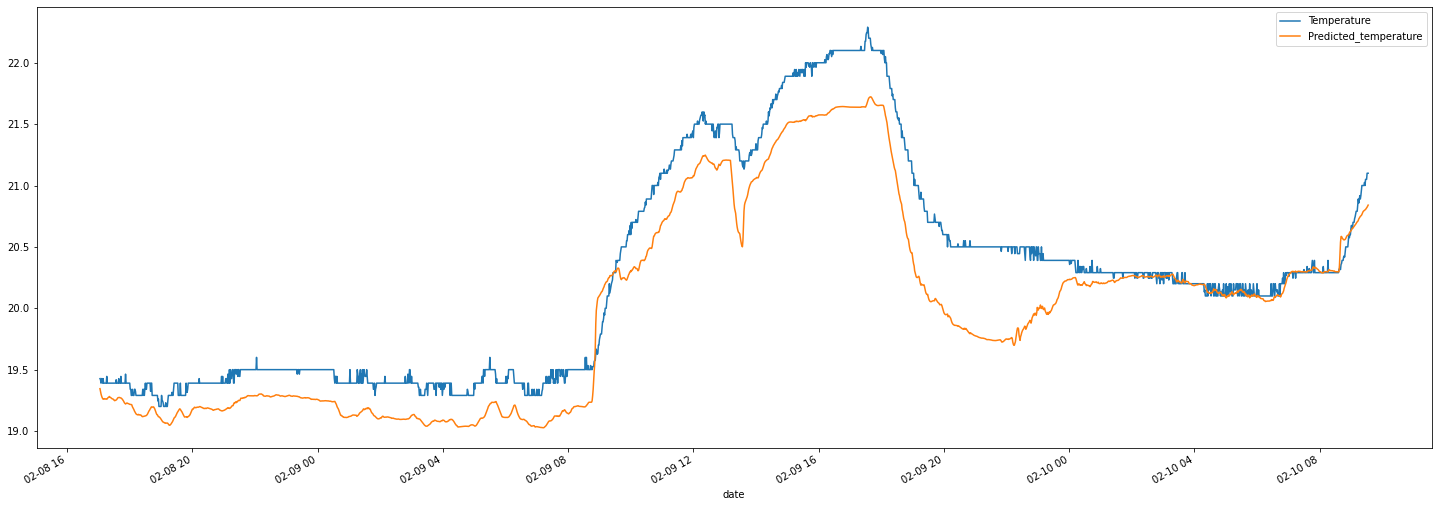

In [232]:
df_final[['Temperature','Predicted_temperature']].plot(figsize=(25,9))